# Lecture 21: Optimal Quadrature

We would like to find quadrature rules for integrals of the type

$$
\int_a^b f(x) W(x) dx \approx \sum_{n=1}^N w_n f(x_n).
$$

Given a set of sample points $\{x_n\}$, we can explicitly solve for the weights $\{w_n\}$
which exactly integrate polynomials of degree $d\leq N-1$:

$$
\begin{pmatrix}
Q_0(x_1) & Q_0(x_2) & \dots & Q_0(x_N) \\
\vdots & \vdots & & \vdots \\
Q_{N-1}(x_1) & Q_{N-1}(x_2) & \dots & Q_{N-1}(x_N) \\
\end{pmatrix}
\begin{pmatrix}
w_1 \\
\vdots \\
w_{N}
\end{pmatrix}
=
\begin{pmatrix}
\langle 1, Q_0\rangle \\
\vdots \\
\langle 1, Q_{N-1} \rangle
\end{pmatrix},
$$

where the $Q_n$ are orthogonal polynomials with respect to the inner product

$$
\langle f, g\rangle = \int_a^b f(x)g(x) W(x) dx.
$$

Gauss quadrature then picks the *roots* of $Q_N(x)$ as sample points, and is able to integrate
all polynomials up to degree $d\leq 2N-1$ exactly.

In [1]:
using PyPlot
PyPlot.svg(true);

using LinearAlgebra

## Legendre polynomials
Legendre polynomials are orthogonal with respect to the standard inner product

$$
\langle f, g\rangle = \int_{-1}^1 f(x) g(x)\, dx
$$

such that
$$
\langle P_n , P_m \rangle = \frac{2}{2n+1} \delta_{nm}.
$$

Rodrigues' formula:

$$
P_n(x) = \frac{1}{2^n n!} \frac{d^n}{dx^n} (x^2 - 1)^n.
$$

Explicit formula:
$$
P_n(x) = \frac{1}{2^n } \sum_{k=0}^n {n \choose k}^2 (x-1)^{n-k} (1+x)^k
$$

Recursion formula:

$$
(n+1) P_{n+1}(x) = (2n+1) x P_n(x) - n P_{n-1}(x).
$$

In [2]:
function legendre(n)
    """ Use explicit formula to evaluate Legendre Polynomial P_n
    """
    function Pn(x)
        f = 0.0
        for k=0:n
            f += 2.0^(-n) * binomial(n, k)^2 * (x - 1)^(n - k) * (x + 1)^k
        end
        return f
    end
end

legendre (generic function with 1 method)

In [9]:
# Example: Legendre polynomials on [-1,1]
N = 10

# Find roots using eigenvalue solver
α(n) = n/(2n+1)
β(n) = 0
γ(n) = (n+1)/(2n+1)

# construct matrix
A(N) = diagm(   0 => β.(0:N-1),
             1 => γ.(0:N-2),
            -1 => α.(1:N-1))

A_N = A(N)

10×10 Array{Float64,2}:
 0.0       1.0  0.0       0.0       0.0       …  0.0       0.0       0.0     
 0.333333  0.0  0.666667  0.0       0.0          0.0       0.0       0.0     
 0.0       0.4  0.0       0.6       0.0          0.0       0.0       0.0     
 0.0       0.0  0.428571  0.0       0.571429     0.0       0.0       0.0     
 0.0       0.0  0.0       0.444444  0.0          0.0       0.0       0.0     
 0.0       0.0  0.0       0.0       0.454545  …  0.0       0.0       0.0     
 0.0       0.0  0.0       0.0       0.0          0.538462  0.0       0.0     
 0.0       0.0  0.0       0.0       0.0          0.0       0.533333  0.0     
 0.0       0.0  0.0       0.0       0.0          0.470588  0.0       0.529412
 0.0       0.0  0.0       0.0       0.0          0.0       0.473684  0.0     

In [10]:
# find roots
xn = eigvals(A_N)

10-element Array{Float64,1}:
 -0.973906528517172  
 -0.8650633666889835 
 -0.6794095682990241 
 -0.43339539412924766
 -0.1488743389816309 
  0.9739065285171717 
  0.8650633666889844 
  0.1488743389816314 
  0.6794095682990237 
  0.4333953941292472 

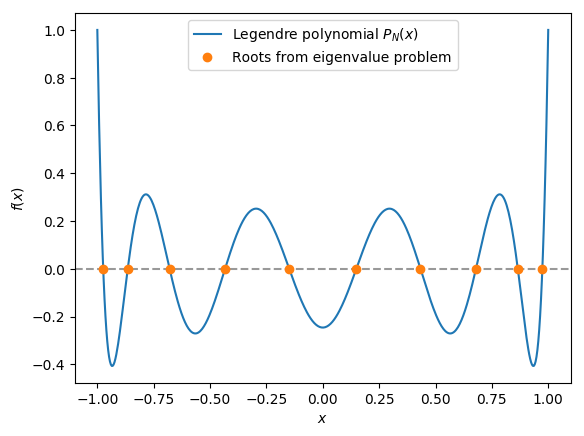

PyObject Text(26.0, 0.5, '$f(x)$')

In [11]:
figure()

xs = LinRange(-1, 1, 500)

P_N = legendre(N)

axhline(0, color="k", alpha=0.4, ls="--")
plot(xs, P_N.(xs), label=L"Legendre polynomial $P_N(x)$")
plot(xn, [0.0 for i=1:length(xn)], "o", label="Roots from eigenvalue problem")

legend()
xlabel(L"x")
ylabel(L"f(x)")

In [12]:
function weights_matrix(N, x)
    """ Construct the matrix B with entries
    B_{ij} = Q_i(x_j)
    """
    Q = [legendre(n) for n=0:N-1]
    
    [Q[i](x[j]) for i=1:length(Q), j=1:length(x)]
end

weights_matrix (generic function with 1 method)

## Optimal quadrature with uniformly spaced weights

In [13]:
# weight matrix for uniformly spaced samples
xn = LinRange(-1, 1, 10)
W = weights_matrix(10, xn)

# rhs
b = zeros(N)
b[1] = 2.0 # from orthogonality

# find quadrature weights
w = W \ b

10-element Array{Float64,1}:
 0.06377232142857125
 0.35136160714285825
 0.02410714285714128
 0.43178571428571516
 0.12897321428571515
 0.12897321428571207
 0.4317857142857162 
 0.02410714285714207
 0.35136160714285725
 0.06377232142857149

In [14]:
# degree 8 polynomial
f(x) = x^8
fn = f.(xn)

10-element Array{Float64,1}:
 1.0                  
 0.13391963118398714  
 0.009074442627116711 
 0.0001524157902758729
 2.3230573125418856e-8
 2.3230573125418856e-8
 0.0001524157902758723
 0.009074442627116711 
 0.13391963118398714  
 1.0                  

In [15]:
exact = (1.0/9)*(1^9 - (-1)^9)

0.2222222222222222

In [16]:
# Quadrature: exact (up to rounding errors)
w'*fn

0.22222222222222215

In [17]:
# degree 9 polynomial
f(x) = x^9
fn = f.(xn)

@show exact = (1.0/10)*(1^10 - (-1)^10)
@show w'*fn 

exact - w'*fn 

exact = (1.0 / 10) * (1 ^ 10 - (-1) ^ 10) = 0.0
w' * fn = 1.249000902703301e-16


-1.249000902703301e-16

In [18]:
# degree 10 polynomial
f(x) = x^10
fn = f.(xn)

@show exact =  (1.0/11)*(1^11 - (-1)^11)
@show w'*fn 

exact - w'*fn 

exact = (1.0 / 11) * (1 ^ 11 - (-1) ^ 11) = 0.18181818181818182
w' * fn = 0.18462409715248684


-0.0028059153343050203

## Gaussian quadrature

In [19]:
# weight matrix for Gaussian samples
A_N = A(10)
xn = eigvals(A_N) # roots of Q_N(x)

W = weights_matrix(10, xn)

# rhs
b = zeros(N)
b[1] = 2.0 # from orthogonality

# find quadrature weights
w = W \ b

10-element Array{Float64,1}:
 0.06667134430868818
 0.1494513491505825 
 0.21908636251597888
 0.26926671930999896
 0.29552422471475104
 0.06667134430868901
 0.14945134915057876
 0.29552422471475503
 0.2190863625159849 
 0.26926671930999285

In [20]:
# degree 10 polynomial
f(x) = x^10
fn = f.(xn)

@show exact = (1.0/11)*(1^11 - (-1)^11)
@show w'*fn;

exact = (1.0 / 11) * (1 ^ 11 - (-1) ^ 11) = 0.18181818181818182
w' * fn = 0.18181818181818216


In [21]:
# degree 18 polynomial
f(x) = x^18
fn = f.(xn)

@show exact = (1.0/19)*(1^19 - (-1)^19)
@show w'*fn

exact - w'*fn

exact = (1.0 / 19) * (1 ^ 19 - (-1) ^ 19) = 0.10526315789473684
w' * fn = 0.10526315789473736


-5.273559366969494e-16

In [22]:
# degree 19 polynomial
f(x) = x^19
fn = f.(xn)

@show exact = (1.0/20)*(1^20 - (-1)^20)
@show w'*fn;

exact = (1.0 / 20) * (1 ^ 20 - (-1) ^ 20) = 0.0
w' * fn = 2.873873271320739e-16


In [27]:
# degree 20 polynomial
f(x) = x^20
fn = f.(xn)

@show exact = (1.0/21)*(1^21 - (-1)^21)
@show w'*fn

# Not exactly integrated anymore.
exact - w'*fn

exact = (1.0 / 21) * (1 ^ 21 - (-1) ^ 21) = 0.09523809523809523
w' * fn = 0.09523516964776506


2.9255903301744768e-6

## Convergence analysis

In [28]:
function optimal_quadrature(f, N)
    xn = LinRange(-1, 1, N)
    W = weights_matrix(N, xn)

    # rhs
    b = zeros(N)
    b[1] = 2.0 # from orthogonality

    # find quadrature weights
    w = W \ b   
    
    fn = f.(xn)
    
    return w'*fn
end

function gauss_quadrature(f, N)
    A_N = A(N)
    xn = eigvals(A_N) # zeros of Q_N(x)
    W = weights_matrix(N, xn)

    # rhs
    b = zeros(N)
    b[1] = 2.0 # from orthogonality

    # find quadrature weights
    w = W \ b   
    
    fn = f.(xn)
    
    return w'*fn
end

function clenshaw_curtis(f, N)
    """ Naive implementation of Clenshaw-Curtis
    using the trapezoid rule for the Fourier coefficients.
    """     
    # compute even Fourier coefficients
    a = zeros(N+1)
    
    θs = collect(0:N).*π./N
    ts = cos.(θs)
    fts = f.(ts)
    
    # Trapezoid rule approximation for the even Fourier coefficients
    for ν=1:2:N+1
        a[ν] = fts[1]/N + fts[end]/N + (2/N)*sum(fts[2:N].*cos.((ν-1)*θs[2:N]))
    end
    
    # compute integral
    I = a[1]
    for ν=3:N+1
        I += 2a[ν]/(1 - (ν-1)^2)
    end
    
    return I
end

function trapezoid_rule(f, a, b, N)
    Δ = (b - a)/N
    
    I = 0.5*Δ*f(a) + 0.5*Δ*f(b)
    for n=1:N-1
        I += Δ*f(a + n*Δ)
    end
    
    return I
end

trapezoid_rule (generic function with 1 method)

In [29]:
f(x) = x^2 - x + exp(x)

f_exact = 2.0/3.0 - exp(-1) + exp(1)

3.0170690539542693

In [30]:
Ns = Int64.(trunc.(2.0.^(1:0.5:5)))

trap_error = [(trapezoid_rule(f, -1, 1, N) - f_exact)/f_exact
        for N in Ns]

opt_error = [(optimal_quadrature(f, N) - f_exact)/f_exact
        for N in Ns]

gauss_error = [(gauss_quadrature(f, N) - f_exact)/f_exact
        for N in Ns]

cc_error = [(clenshaw_curtis(f, N) - f_exact)/f_exact
        for N in Ns];

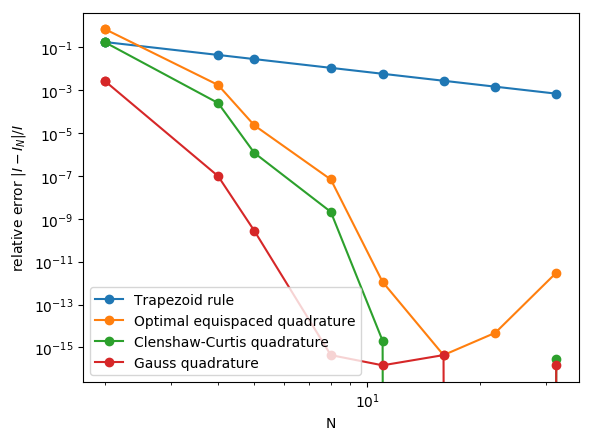

PyObject <matplotlib.legend.Legend object at 0x7fe49d4a8550>

In [31]:
figure()

loglog(Ns, abs.(trap_error), "o-", label="Trapezoid rule")
loglog(Ns, abs.(opt_error), "o-", label="Optimal equispaced quadrature")
loglog(Ns, abs.(cc_error), "o-", label="Clenshaw-Curtis quadrature")
loglog(Ns, abs.(gauss_error), "o-", label="Gauss quadrature")

xlabel("N")
ylabel(L"relative error $|I - I_N|/I$")
legend()